In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from sklearn import datasets
from sklearn import svm

# Load Iris dataset

In [2]:
iris = datasets.load_iris()
display(iris.feature_names)
display(iris.target_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
X, y = iris.data, iris.target
display(X.shape)
display(y.shape)

(150, 4)

(150,)

# Explore dataset

In [4]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['class'] = iris.target
df['class'] = df['class'].apply(lambda s: iris.target_names[s])
df.groupby('class').head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


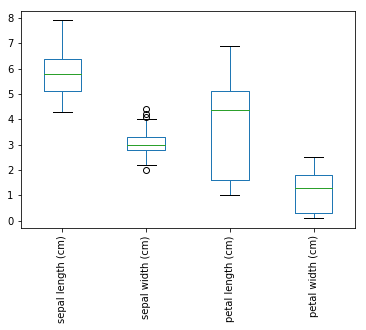

In [5]:
df.plot.box(rot=90)
plt.show()

# Create Model with SVM

In [9]:
model = svm.SVC()
model.fit(X, y)

def predict(model, data):
    pred = model.predict([[
        data['sepal_length'], 
        data['sepal_width'],
        data['petal_length'],
        data['petal_width']
    ]])[0]
    classes = ['setosa', 'versicolor', 'virginica']
    return {
        'class': classes[pred]
    }

In [10]:
predict(model, {
    'sepal_length': 6.5, 
    'sepal_width': 3.0, 
    'petal_length': 5.8, 
    'petal_width': 2.2
})

{'class': 'virginica'}

# Save model as pickle

In [11]:
filename = "iris_model.pkl"  
with open(filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
http://localhost:5000/api/iris/predict?sepal_length=6.5&sepal_width=3&petal_length=5.8&petal_width=2

In [12]:
float('3.0')

3.0